In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
import tensorflow_hub as hub

import matplotlib.pyplot as plt
import numpy as np

In [3]:
datasets, info = tfds.load(
    "imdb_reviews/plain_text",
    split=["train", "test[:50%]", "test[50%:]"],
    as_supervised=True,
    with_info=True
)
datasets_train_original = datasets[0]
datasets_validate_original = datasets[1]
datasets_test_original = datasets[2]
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset.
    This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_path='C:\\Users\\DAnand\\tensorflow_datasets\\imdb_reviews\\plain_text\\1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_

In [4]:
print(tf.random.uniform(shape=(), minval=1, maxval=5, dtype=tf.int32))

tf.Tensor(3, shape=(), dtype=int32)


In [5]:
for x,y in datasets_train_original.shuffle(1000).take(1):
    print(x.numpy().decode("utf-8"))
    print(y.numpy())

had some lovely poetic bits but is really just an artsy-fartsy toss-together with no direction or resolution. how do these people get through film school? who gives them money to make this crap? could have been so much more, fine lead actor, and i always like Fairuza Balk, but come on, the alt-rock metaphor of just staring vacantly unable to find anything compelling is just so tired, and it sure doesn't make for good films. the director needs to go away and live life for a good long while and not come back to the camera until they really have something to say. this is like the throw-spaghetti-at-the-wall school of art-making, just juxtapose a bunch of earnest imagery and hope hope hope like hell that poetry emerges. that can work, if the director actually has any kind of vision, or has a brain that knows when it's in the presence of potential, but here it's just space filler, of no consequence. i felt the lazy ending coming moments before it hit, and was yelling "you lazy bastard" at t

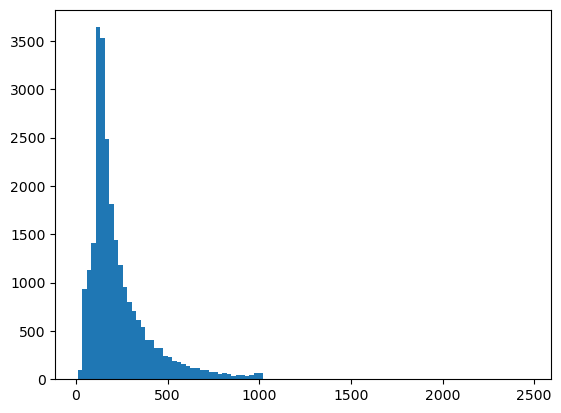

In [6]:
#distribution of number of words
#outliers IQR
lenghts = []
for x, _ in datasets_train_original:
    x = x.numpy().decode("utf-8").split()
    lenghts += [len(x)]
plt.hist(lenghts, bins=100)
plt.show()
plt.close()

In [7]:
#hyperparameter
vocabulary_size = 10_000

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="multi_hot"
)

encoder.adapt(datasets_train_original.map(lambda text, label: text).batch(2048))

In [8]:
encoder.get_vocabulary()[:20]

['[UNK]',
 'the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'br',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film']

In [9]:
text = "Hello my dear friends! It is so great to be here today!"

def multi_hot_to_string(multi_hot):
    return " ".join([str(int(x)) for x in multi_hot])

text_encoded = encoder(text).numpy()
print(multi_hot_to_string(text_encoded))

# plt.imshow(text_encoded.numpy().reshape(1,10000))

0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [10]:
#TODO get tokens
count=0
for num in text_encoded:
  if num == 1:
    print(encoder.get_vocabulary()[count])
  count = count + 1



to
is
it
be
so
my
great
here
friends
today
dear
hello


In [11]:
dataset_train = datasets_train_original.cache()
dataset_train = dataset_train.shuffle(25_000)
dataset_train = dataset_train.batch(128)

dataset_validate = datasets_validate_original.cache()
dataset_validate = dataset_validate.batch(128)

dataset_test = datasets_test_original.batch(128)

In [12]:
from pickletools import optimize


model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_validate
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 640,129
Trainable params: 640,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 10s 42ms/step - loss: 0.3331 - accuracy: 0.8625 - val_loss: 0.2923 - val_accuracy: 0.8795
Epoch 2/10
196/196 [==============================] - 8s 43ms/step - loss: 0.1868 - accuracy: 0.9297 - v

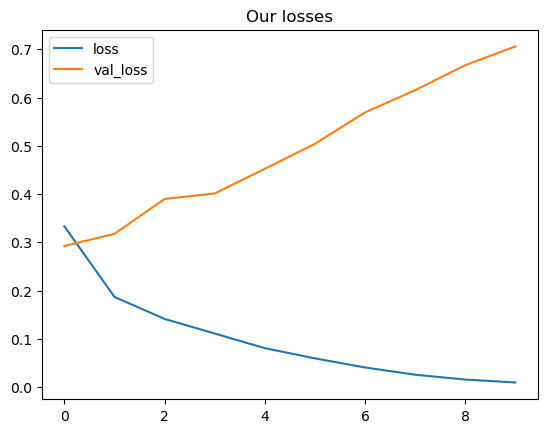

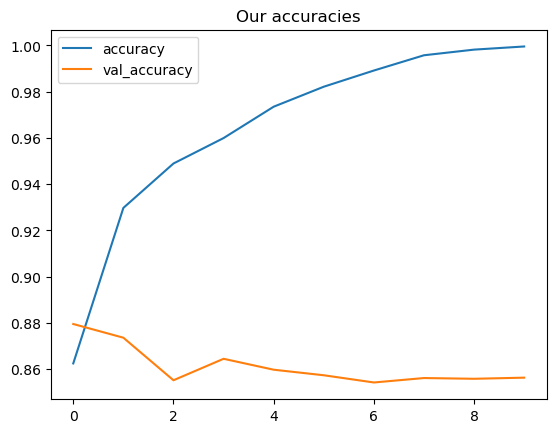

In [13]:
def render_history(history):
    plt.title("Our losses")
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.show()
    plt.close()

    plt.title("Our accuracies")
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.show()
    plt.close()

render_history(history)

In [14]:
tf.compat.v1.Session()

In [15]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 960M, pci bus id: 0000:01:00.0, compute capability: 5.0



In [16]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
for text, label in dataset_train.take(1):
    print(text.shape, label.shape)

(128,) (128,)


In [18]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(32, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=10,
    validation_data=dataset_validate
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense_2 (Dense)             (None, 64)                640064    
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 9s 41ms/step - loss: 0.3239 - accuracy: 0.8643 - val_loss: 0

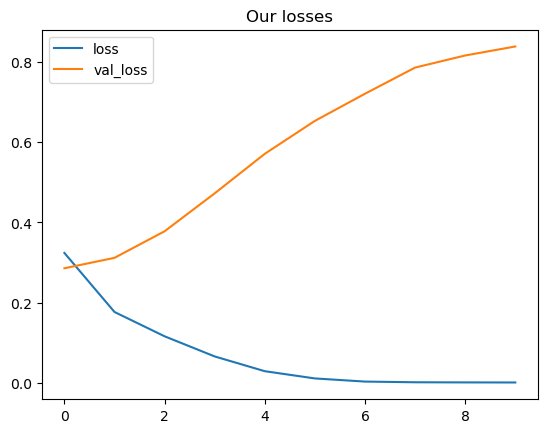

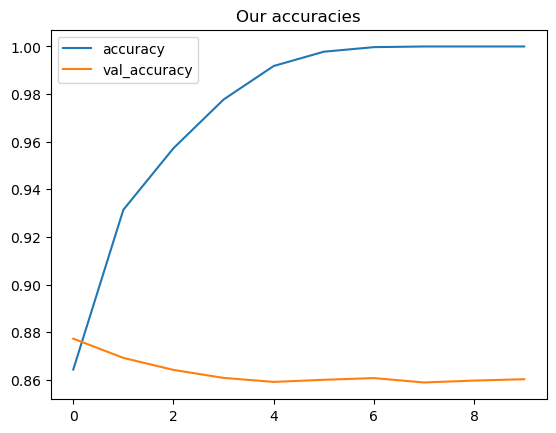

In [19]:
render_history(history)

In [20]:
model = models.Sequential()
model.add(encoder)
# model.add(layers.Dense(32, activation="relu"))
# model.add(layers.Dense(32, activation="tanh"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    # optimizer="adam",
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=50,
    validation_data=dataset_validate
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 10000)            0         
 torization)                                                     
                                                                 
 dense_5 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 10,001
Trainable params: 10,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 7s 34ms/step - loss: 0.5227 - accuracy: 0.8086 - val_loss: 0.4377 - val_accuracy: 0.8584
Epoch 2/50
196/196 [==============================] - 7s 33ms/step - loss: 0.3719 - accuracy: 0.8820 - val_loss: 0.3683 - val_accuracy: 0.8747
Epoch 3/50
196/196 [==============================] - 7s 34ms/step - loss: 0.3131 - accuracy: 

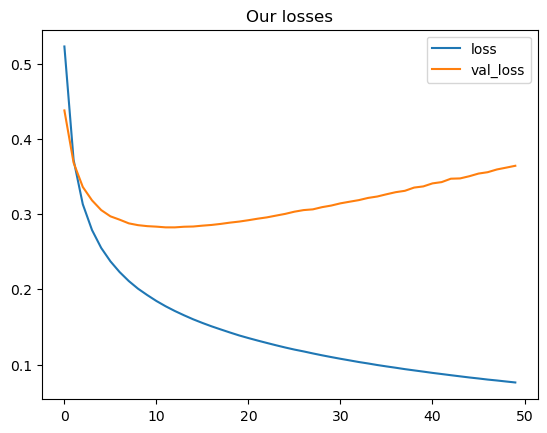

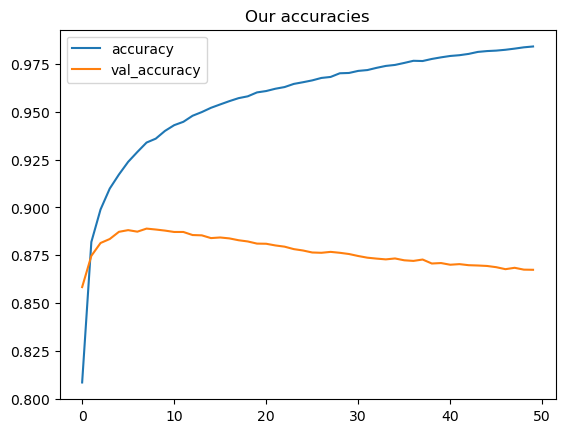

In [21]:
render_history(history)

In [22]:
collection = []
for index, word in enumerate(encoder.get_vocabulary()):
    print(type(word), word)
    prediction = model.predict([str(word)], verbose=0)[0][0]
    print(prediction)
    collection += [[word, prediction]]
    if index == 5:
        break

collection = sorted(collection, key = lambda x: x[1], reverse=True)
print(collection)

for word, prediction in collection:
    print(word, "\t", prediction)

<class 'str'> [UNK]
0.5390755
<class 'numpy.str_'> the
0.54874367
<class 'numpy.str_'> and
0.5413655
<class 'numpy.str_'> a
0.5008349
<class 'numpy.str_'> of
0.5075189
<class 'numpy.str_'> to
0.5097346
[['the', 0.54874367], ['and', 0.5413655], ['[UNK]', 0.5390755], ['to', 0.5097346], ['of', 0.5075189], ['a', 0.5008349]]
the 	 0.54874367
and 	 0.5413655
[UNK] 	 0.5390755
to 	 0.5097346
of 	 0.5075189
a 	 0.5008349


In [23]:
model.predict(["this is a good movie i love it a lot great acting brilliant story fantastic music"])

1/1 [==============================] - 0s 51ms/step


array([[0.9680802]], dtype=float32)

In [24]:
import tqdm
collection = []
for _, word in tqdm.tqdm(enumerate(encoder.get_vocabulary())):
    # print(type(word), word)
    prediction = model.predict([str(word)], verbose=0)[0][0]
    # print(prediction)
    collection += [[word, prediction]]
    # if index == 5:
    #     break

collection = sorted(collection, key = lambda x: x[1], reverse=True)
# print(collection)

for word, prediction in collection:
    print(word, "\t", prediction)

10000it [15:37, 10.67it/s]

710 	 0.949186
810 	 0.8997402
refreshing 	 0.8641561
chavez 	 0.86063224
hooked 	 0.8569599
appreciated 	 0.85268056
910 	 0.8523838
gently 	 0.84292173
firstrate 	 0.84112316
vengeance 	 0.84013176
cracking 	 0.8346109
excellently 	 0.8344129
delightfully 	 0.83308685
greene 	 0.8292026
scariest 	 0.82877666
absorbing 	 0.8283445
ramones 	 0.8281564
cerebral 	 0.8259787
edie 	 0.82586265
deathtrap 	 0.82439256
kitty 	 0.82329184
1010 	 0.8217482
hawke 	 0.82089406
gackt 	 0.8159757
tonys 	 0.81502706
jacques 	 0.8139157
excellent 	 0.8111277
lindy 	 0.8104688
vulnerability 	 0.810318
capote 	 0.8102162
raines 	 0.80715823
goldsworthy 	 0.8065342
sailors 	 0.80640495
7 	 0.8049642
wonderfully 	 0.8043389
driven 	 0.8032835
delightful 	 0.8032635
definite 	 0.80319345
fritz 	 0.80261743
photograph 	 0.80245066
noir 	 0.80191314
soylent 	 0.8009251
sorrow 	 0.8004612
cloth 	 0.799475
flawless 	 0.7982142
rare 	 0.7958559
miikes 	 0.795297
bravo 	 0.7952797
finely 	 0.7951618
cheech 	 0.

In [25]:
vocabulary_size = 10_000
sequence_length = 128

encoder = layers.TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=sequence_length,
    standardize="lower_and_strip_punctuation",
    split="whitespace",
    output_mode="int"
)

encoder.adapt(datasets_train_original.map(lambda text,label: text).batch(512))

In [26]:
model = models.Sequential()
model.add(encoder)
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=32))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

model.compile(
    # optimizer="adam",
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    dataset_train,
    epochs=30,
    validation_data=dataset_validate
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 128)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 128, 32)           320000    
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                262208    
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 582,273
Trainable params: 582,273
Non-trainable params: 0
________________________________________________

In [27]:
# encoder.get_vocabulary()[:40]


In [28]:
# encoder.get_vocabulary()

In [29]:
encoder("This is a aassdasd great movie!")

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([11,  7,  4,  1, 85, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)>